# Exercise 11

In [34]:
# Settings and libraries:

import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
SCALE = 5
FIG_SIZE = (SCALE*0.5*(1+np.sqrt(5)),SCALE)

# Machine Learning libraries

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

## Linear fit

In [53]:
# linear regression parameters:

m = 2          # slope
q = 1          # intercept
x_low = -1     # lower bound 
x_up = 1       # upper bound

# training dataset and validation dataset parameters:

N_train = 1000    # training points
N_val = 100       # validation points
sigma = 0.3      # noise stdev

In [54]:
# generate training inputs:

np.random.seed(0)
x_train = np.random.uniform(x_low, x_up, N_train)
x_valid = np.random.uniform(x_low, x_up, N_val)
x_valid.sort()

# target linear function
y_target = m * x_valid + q

# actual measures with the presence of noise
y_train = np.random.normal(m * x_train + q, sigma)
y_valid = np.random.normal(m * x_valid + q, sigma)

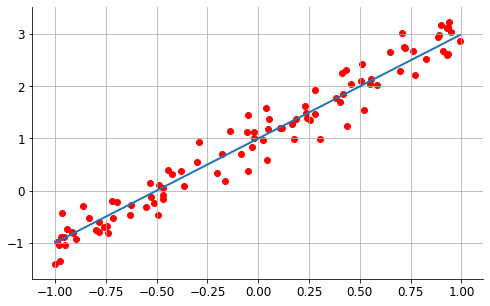

In [55]:
plt.figure(figsize=FIG_SIZE)
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True)
plt.show()

In [56]:
# NN construction:

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# Model compilation:

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [57]:
# fit the model using training dataset: we will try to change the batch size and the epochs number
# over 10 epochs of 32 batch size each
# report training progress against validation data

batch = 32
epoch = 30
history = model.fit(x=x_train, y=y_train, 
          batch_size=batch, epochs=epoch,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/30
32/32 [==============================] - 0s 7ms/step - loss: 0.7040 - mse: 0.7040 - val_loss: 0.3957 - val_mse: 0.3957
Epoch 2/30
32/32 [==============================] - 0s 4ms/step - loss: 0.2711 - mse: 0.2711 - val_loss: 0.1817 - val_mse: 0.1817
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 0.1449 - mse: 0.1449 - val_loss: 0.1176 - val_mse: 0.1176
Epoch 4/30
32/32 [==============================] - 0s 4ms/step - loss: 0.1075 - mse: 0.1075 - val_loss: 0.0968 - val_mse: 0.0968
Epoch 5/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0955 - mse: 0.0955 - val_loss: 0.0878 - val_mse: 0.0878
Epoch 6/30
32/32 [==============================] - 0s 6ms/step - loss: 0.0907 - mse: 0.0907 - val_loss: 0.0833 - val_mse: 0.0833
Epoch 7/30
32/32 [==============================] - 0s 3ms/step - loss: 0.0885 - mse: 0.0885 - val_loss: 0.0805 - val_mse: 0.0805
Epoch 8/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0872 - mse: 0.08

In [58]:
# get the fit parameters:
model.get_weights()

[array([[2.0035598]], dtype=float32), array([1.0041878], dtype=float32)]

In [59]:
# evaluate the goodness of the model:

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance:

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.0738 - mse: 0.0738

Test loss: 0.07382414489984512
Test accuracy: 0.07382414489984512


In [60]:
# evaluate model with the exact curve:

score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance:

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 4ms/step - loss: 2.1289e-05 - mse: 2.1289e-05

Test loss: 2.1289240976329893e-05
Test accuracy: 2.1289240976329893e-05


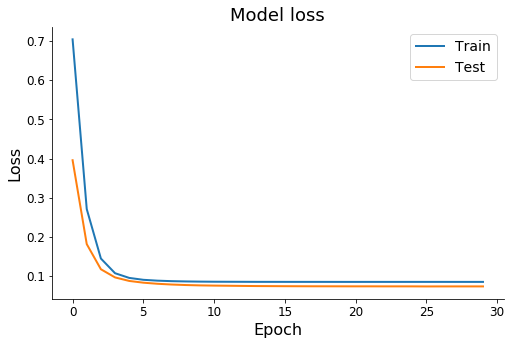

In [61]:
# look into training history: plot training & validation loss vs epochs:

plt.figure(figsize=FIG_SIZE)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

## Polinomial fit

## Trigonometric fit